# Capstone 3rd Modul Project - Machine Learning

Created by  : Deryl Baharudin Sopandi

Class       : Job Connector Data Science and Machine Learning - Video Learning After Office Hour

Project     : Telco Customer Churn

## Business Problem Understanding
### Context
Perusahaan Telco bergerak di bidang pelayanan jasa telepon rumah dan layanan internet. Seperti perusahaan telekomunikasi lainya, perusahaan ini memiliki masalah yang dihadapi terkait customer churn.

Dari dataset ini, setiap baris menunjukan konsumen dan kolom menunjukan atribut konsumen. Dataset memuat informasi mengenai:
- Konsumen yang Churn pada bulan sebelumnya (Churn).
- Service yang digunakan oleh konsumen (Online Security, Online Backup, Internet Service, Device Protection, Tech Support).
- Informasi akun konsumen (Tenure, Contract, Paperless Billing, Monthly Charges).
- Demografi konsumen (Dependents).

Target Variabel: Churn
0: Tidak Churn (tetap menggunakan layanan perusahaan Telco)
1: Churn (meninggalkan layanan perusahaan Telco)

### Problem Statement
Customer churn artinya kehilangan konsumen dari sebuah bisnis. Churn ini dihitung dari jumlah konsumen yang meninggalkan layanan ini pada periode waktu tertentu. Customer Churn Analysis penting bagi sebuah bisnis karena menggambarkan kesuksesan bisnis dari segi retain konsumen. Bisnis yang baik memiliki Nilai Customer Churn yang rendah artinya konsumen setia untuk menggunakan layanan bisnis tersebut. Churn rate tahunan untuk perusahaan telekomunikasi rata-rata berkisar diantara 10% - 67%. Survey Retensi industri menunjukan bahwa harga dan produk itu penting, kebanyakan orang akan meninggalkan layanan karena ketidakpuasan yang mereka rasakan. Pada industri telekomunikasi membutuhkan ribuan dolar untuk mendapatkan konsumen baru.

Pada Kasus ini, Perusahaan Telco ingin mengetahui tingkat Customer Churn perusahaan pada waktu tertentu (Periode waktu database diambil).

### Goals
Maka berdasakan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang konsumen akan meninggalkan layanan perusahaan Telco.

Dan juga, perusahaan ingin mengetahui apa saja faktor/variabel yang mempengaruhi secara signifikan seseorang menginggalkan layanan perusahaan Telco sehingga mereka bisa memberikan adjustment/treat terhadap konsumen tersebut untuk tidak churn.

### Analytic Approach
Pada tugas ini, yang akan dilakukan adalah menganalisis data untuk melakukan pola yang membedakan konsumen yang akan churn dan yang tidak churn.

Kemudian akan dibangun model klasifikasi yang membantu perusahaan untuk dapat memprediksi probabilitas seorang kandidat akan churn atau tidak.

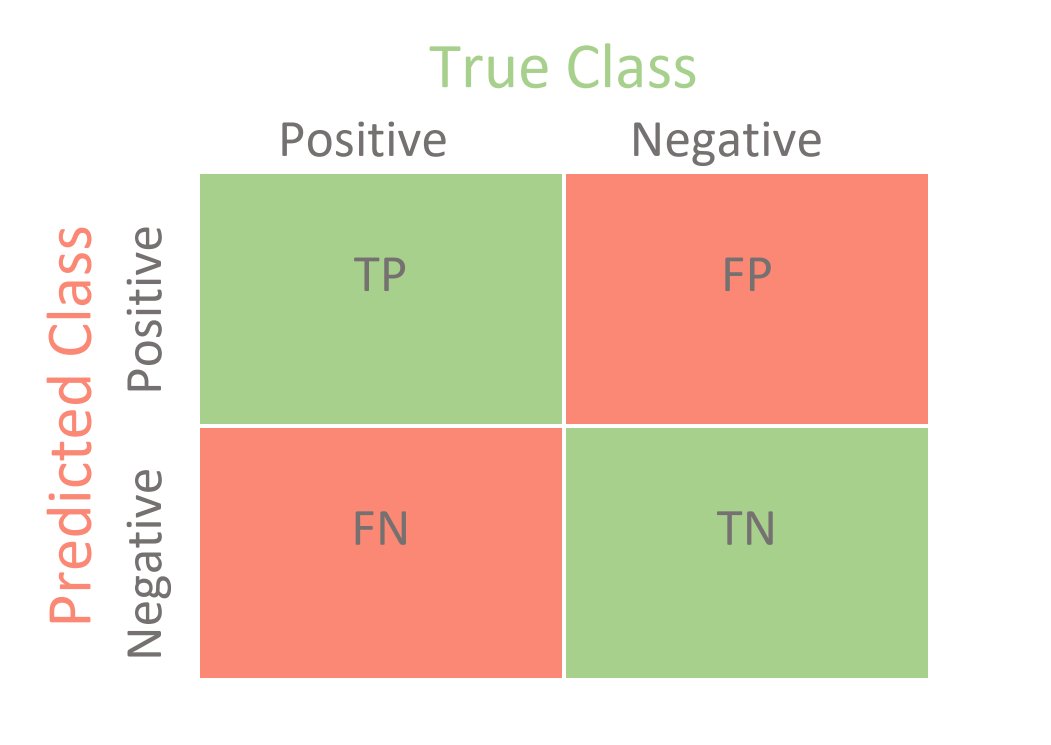

In [ ]:
from IPython import display
display.Image("./CMatrix.png")

### Metric Evaluation

Type 1 error: False Positive
Konsekuensi: terbuang biaya untuk treatment/adjustment konsumen agar tidak churn.

Type 2 error: False Negative
Konsekuensi: Kehilangan konsumen.

Berdasarkan konsekuensinya, kita akan membuat model yang dapat meminimalkan terbuangnya biaya untuk treatment konsumen (minimize type 1 error) dan meminimalkan kehilangan konsumen (minimize type 2 error) sehingga precision dan recall nya baik. Terdapat beberapa metric yang dapat digunakan yaitu:
- F-measure
- Confusion matrix
- Accuracy score
- ROC (Receiver Operating Characteristic) Curve
- AUC for ROC (Area Under the ROC Curve)
- PRC (Precision-Recall Curve)
- AUC for PRC (Area Under the PRC)
- F1 score
Metrics yang akan digunakan berdasarkan pertimbangan diatas adalah roc_auc (AUC for ROC) yang akan saya ambil tersedia dari library Scikit Learn.

## Data Understanding
Data source : 
- https://www.kaggle.com/datasets/blastchar/telco-customer-churn (Dataset's Informations)
- Purwadhika (Dataset for Model Training)

Note        :
- Dataset tidak seimbang
- Target variabel target (Churn) berisi data kategori binary
- Fitur-fitur berisi data numerik dan kategori (nominal, binary)
- Dataset yang didapatkan adalah dataset training (telah dilakukan splitting oleh Purwadhika)


## Import Library

In [6]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 589 kB/s 


In [7]:
# Data Library
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
from IPython.display import display

# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from category_encoders import BinaryEncoder

# Splitting Data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix

# Tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score

# Deployment
import pickle

# Ignore warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## Load Data

In [ ]:
# Load Dataset
df = pd.read_csv("data_telco_customer_churn.csv")
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [ ]:
# Create Desc of df
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[No, Yes]"
1,tenure,int64,0,0.0,73,"[18, 11]"
2,OnlineSecurity,object,0,0.0,3,"[Yes, No internet service]"
3,OnlineBackup,object,0,0.0,3,"[No internet service, Yes]"
4,InternetService,object,0,0.0,3,"[Fiber optic, DSL]"
5,DeviceProtection,object,0,0.0,3,"[Yes, No]"
6,TechSupport,object,0,0.0,3,"[No, No internet service]"
7,Contract,object,0,0.0,3,"[Month-to-month, One year]"
8,PaperlessBilling,object,0,0.0,2,"[No, Yes]"
9,MonthlyCharges,float64,0,0.0,1422,"[105.95, 99.45]"


### Data Cleaning

#### Missing Value

Tidak ada missing value pada dataframe

#### Drop Column

Tidak ada fitur yang unik untuk setiap konsumen, dan seluruh fitur dibutuhkan untuk analisis lanjutan

## Explanatory Data Analysis

### Overview

Churn analitik memberikan preduksi konsumen yang churn. Konsumen yang churn dapat diakibatkan oleh beberapa hal seperti ada penawaran paket layanan dari kompetitor yang lebih baik, service yang jelek, layanan purna-jual yang buruk, situasi konsumen saat itu, dsb. Penting bagi perusahaan telekomunikasi mengetahui konsumen mana yang mungkin berpeluang churn sehingga mereka dapat mencegahnya.

Telco dapat mengaplikasikan machine learning model untuk memprediksi churn untuk setiap konsumen dan merencanakan anggaran untuk mengatasi hal tersebut seperti memberikan diskon, penawaran spesial atau gratifikasi lainya. Customer Churn Analysis adalah tipe masalah klasifikasi supervised learning dalam machine learning.

### Target
Churn: Apakah konsumen ini akan meninggalkan layanan Telco?
(Categorical: Yes, No)

### Features Init
- Dependents: Apakah konsumen memiliki anak?
(Categorical: Yes, No)
- Tenure: Berapa lama konsumen telah menggunakan layanan?
(Numerical)
- OnlineSecurity: Apakah konsumen menggunakan layanan online security?
(Categorical: Yes, No, No internet service)
- OnlineBackup: Apakah konsumen menggunakan layanan online Backup?
(Categorical: Yes, No, No internet service)
- InternetService: Apakah konsumen menggunakan layanan Internet Service?
(Categorical: DSL, Fiber optic, No)
- DeviceProtection: Apakah konsumen menggunakan layanan Device Protection?
(Categorical: Yes, No, No internet service)
- TechSupport: Apakah konsumen menggunakan layanan Tech Support?
(Categorical: Yes, No, No internet service)
- Contract: Bagaimana tipe kontrak layanan yang diambil konsumen?
(Categorical: Month-to-month, One year, Two year)
- PaperlessBilling: Apakah konsumen menggunakan layanan Paperless Billing?
(Categorical: Yes, No)
- MonthlyCharges: Berapa tagihan bulanan setiap konsumen?
(Numerical)
Terdapat 10 fitur yang digunakan untuk analisis awal.

In [ ]:
df_eda = df.copy()

In [ ]:
df[['tenure','MonthlyCharges']].describe()

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [ ]:
df.corr()

,tenure,MonthlyCharges
tenure,1.000000,0.240244
MonthlyCharges,0.240244,1.000000


## Data Preprocessing

### Preprocessing Scheme Without Scaler
- OneHotEncoding: Dependents, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract, PaperBilling
- Target: Churn

In [ ]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 
                                                         'InternetService', 'DeviceProtection', 
                                                         'TechSupport', 'Contract', 'PaperlessBilling'])
], remainder='passthrough')


### Preprocessing Scheme With Scaler
- OneHotEncoding: Dependents, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract, PaperBilling
- MinMaxScaler: tenure, MonthlyCharges
- Target: Churn

In [ ]:
transformer_scaler = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 
                                                         'InternetService', 'DeviceProtection', 
                                                         'TechSupport', 'Contract', 'PaperlessBilling']),
    ('scaling', MinMaxScaler(), ['tenure','MonthlyCharges'])
])

### Imbalance Identification and Define Target Data

In [ ]:
df['Churn'].value_counts()/df.shape[0]*100

No     73.306288
Yes    26.693712
Name: Churn, dtype: float64

Data terindikasi imbalance.

In [ ]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

1: Customer Churn

0: Customer Retain

Prediction Intepretation:
- TP: Konsumen diprediksi Churn dan aktualnya adalah Churn
- FP: Konsumen diprediksi Churn dan aktualnya adalah Tidak Churn
- TN: Konsumen diprediksi Tidak Churn dan aktualnya adalah Tidak Churn
- FN: Konsumen diprediksi Tidak Churn dan aktualnya adalah Churn

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

### Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                   test_size = 0.3,
                                                   random_state = 2022)

## Modeling and Evaluation

### Model Selection

#### Define Model

Saya menggunakan beberapa Model Klasifikasi dalam Supervised Learning. Saya memilih 3 model basic dan 4 model ensemble.
- Basic models:
    * Logistic Regression (logreg)
    * Decision Tree Classifier (tree)
    * K-Nearest Neighbor (knn)
- Ensemble models:
    * Random Forest Classifier (rf)
    * Ada Boost Classifier (ada)
    * Gradient Boosting Classifier (grad)
    * XGB Classifier (xgboost)

In [ ]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 2022)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 2022)
ada = AdaBoostClassifier(random_state = 2022)
grad = GradientBoostingClassifier(random_state = 2022)
xgboost = XGBClassifier(random_state = 2022)

#### Cross Validation Pipeline

#### Tanpa Scaller

In [ ]:
logreg_pipe = Pipeline([('transformer', transformer), ('logreg', logreg)])
tree_pipe = Pipeline([('transformer', transformer), ('tree', tree)])
knn_pipe = Pipeline([('transformer', transformer), ('knn', knn)])
rf_pipe = Pipeline([('transformer', transformer), ('rf', rf)])
ada_pipe = Pipeline([('transformer', transformer), ('ada', ada)])
grad_pipe = Pipeline([('transformer', transformer), ('grad', grad)])
xgb_pipe = Pipeline([('transformer', transformer), ('xgboost', xgboost)])

def model_evaluation(model, metric):
    model_cv = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = metric)
    return model_cv

logreg_pipe_cv = model_evaluation(logreg_pipe, 'roc_auc')
tree_pipe_cv = model_evaluation(tree_pipe, 'roc_auc')
knn_pipe_cv = model_evaluation(knn_pipe, 'roc_auc')
rf_pipe_cv = model_evaluation(rf_pipe, 'roc_auc')
ada_pipe_cv = model_evaluation(ada_pipe, 'roc_auc')
grad_pipe_cv = model_evaluation(grad_pipe, 'roc_auc')
xgb_pipe_cv = model_evaluation(xgb_pipe, 'roc_auc')

for model in [logreg_pipe, tree_pipe, knn_pipe, rf_pipe, ada_pipe, grad_pipe, xgb_pipe]:
    model.fit(X_train, y_train)

score_cv = [logreg_pipe_cv.round(5), tree_pipe_cv.round(5), knn_pipe_cv.round(5),
            rf_pipe_cv.round(5), ada_pipe_cv.round(5), grad_pipe_cv.round(5), xgb_pipe_cv.round(5)]
score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), knn_pipe_cv.mean(), rf_pipe_cv.mean(),
              ada_pipe_cv.mean(), grad_pipe_cv.mean(), xgb_pipe_cv.mean()]
score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), knn_pipe_cv.std(), rf_pipe_cv.std(),
             ada_pipe_cv.std(), grad_pipe_cv.std(), xgb_pipe_cv.std()]
score_roc_auc = [roc_auc_score(y_test, logreg_pipe.predict(X_test)),
                roc_auc_score(y_test, tree_pipe.predict(X_test)), 
                roc_auc_score(y_test, knn_pipe.predict(X_test)), 
                roc_auc_score(y_test, rf_pipe.predict(X_test)),
                roc_auc_score(y_test, ada_pipe.predict(X_test)),
                roc_auc_score(y_test, grad_pipe.predict(X_test)),
                roc_auc_score(y_test, xgb_pipe.predict(X_test))]
method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'Random Forest Classifier',
               'Ada Boost Classifier', 'Gradient Boosting Classifier', 'XGB Classifier']
cv_summary = pd.DataFrame({
    'method': method_name,
    'cv score': score_cv,
    'mean score': score_mean,
    'std score': score_std,
    'roc_auc score': score_roc_auc
})
cv_summary

,method,cv score,mean score,std score,roc_auc score
0,Logistic Regression,"[0.82315, 0.82719, 0.85131, 0.84405, 0.84508]",0.838154,0.010962,0.720599
1,Decision Tree Classifier,"[0.62816, 0.62852, 0.66559, 0.68905, 0.64515]",0.651296,0.023332,0.639148
2,KNN Classifier,"[0.78068, 0.74706, 0.7839, 0.76973, 0.77198]",0.770669,0.012923,0.666491
3,Random Forest Classifier,"[0.78966, 0.80479, 0.8238, 0.82894, 0.81338]",0.812117,0.013993,0.684920
4,Ada Boost Classifier,"[0.82401, 0.82474, 0.85292, 0.84495, 0.84736]",0.838797,0.012054,0.725565
5,Gradient Boosting Classifier,"[0.83149, 0.82359, 0.85052, 0.83767, 0.84966]",0.838588,0.010404,0.713014
6,XGB Classifier,"[0.80608, 0.80198, 0.82376, 0.81976, 0.80992]",0.812303,0.008219,0.677765


#### Dengan Scaller

In [ ]:
logreg_pipe = Pipeline([('transformer', transformer_scaler), ('logreg', logreg)])
tree_pipe = Pipeline([('transformer', transformer_scaler), ('tree', tree)])
knn_pipe = Pipeline([('transformer', transformer_scaler), ('knn', knn)])
rf_pipe = Pipeline([('transformer', transformer_scaler), ('rf', rf)])
ada_pipe = Pipeline([('transformer', transformer_scaler), ('ada', ada)])
grad_pipe = Pipeline([('transformer', transformer_scaler), ('grad', grad)])
xgb_pipe = Pipeline([('transformer', transformer_scaler), ('xgboost', xgboost)])

def model_evaluation(model, metric):
    model_cv = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = metric)
    return model_cv

logreg_pipe_cv = model_evaluation(logreg_pipe, 'roc_auc')
tree_pipe_cv = model_evaluation(tree_pipe, 'roc_auc')
knn_pipe_cv = model_evaluation(knn_pipe, 'roc_auc')
rf_pipe_cv = model_evaluation(rf_pipe, 'roc_auc')
ada_pipe_cv = model_evaluation(ada_pipe, 'roc_auc')
grad_pipe_cv = model_evaluation(grad_pipe, 'roc_auc')
xgb_pipe_cv = model_evaluation(xgb_pipe, 'roc_auc')

for model in [logreg_pipe, tree_pipe, knn_pipe, rf_pipe, ada_pipe, grad_pipe, xgb_pipe]:
    model.fit(X_train, y_train)

score_cv = [logreg_pipe_cv.round(5), tree_pipe_cv.round(5), knn_pipe_cv.round(5),
            rf_pipe_cv.round(5), ada_pipe_cv.round(5), grad_pipe_cv.round(5), xgb_pipe_cv.round(5)]
score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), knn_pipe_cv.mean(), rf_pipe_cv.mean(),
              ada_pipe_cv.mean(), grad_pipe_cv.mean(), xgb_pipe_cv.mean()]
score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), knn_pipe_cv.std(), rf_pipe_cv.std(),
             ada_pipe_cv.std(), grad_pipe_cv.std(), xgb_pipe_cv.std()]
score_roc_auc = [roc_auc_score(y_test, logreg_pipe.predict(X_test)),
                roc_auc_score(y_test, tree_pipe.predict(X_test)), 
                roc_auc_score(y_test, knn_pipe.predict(X_test)), 
                roc_auc_score(y_test, rf_pipe.predict(X_test)),
                roc_auc_score(y_test, ada_pipe.predict(X_test)),
                roc_auc_score(y_test, grad_pipe.predict(X_test)),
                roc_auc_score(y_test, xgb_pipe.predict(X_test))]
method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'Random Forest Classifier',
               'Ada Boost Classifier', 'Gradient Boosting Classifier', 'XGB Classifier']
cv_summary_scaler = pd.DataFrame({
    'method': method_name,
    'cv score': score_cv,
    'mean score': score_mean,
    'std score': score_std,
    'roc_auc score': score_roc_auc
})
cv_summary_scaler

,method,cv score,mean score,std score,roc_auc score
0,Logistic Regression,"[0.82259, 0.82788, 0.85083, 0.84442, 0.84478]",0.838099,0.010880,0.720256
1,Decision Tree Classifier,"[0.62888, 0.62479, 0.66684, 0.68905, 0.64143]",0.650198,0.024345,0.642946
2,KNN Classifier,"[0.75845, 0.7781, 0.79282, 0.79599, 0.79778]",0.784627,0.014813,0.681584
3,Random Forest Classifier,"[0.7901, 0.80182, 0.8212, 0.82784, 0.81308]",0.810808,0.013512,0.686990
4,Ada Boost Classifier,"[0.82401, 0.82474, 0.85292, 0.84495, 0.84736]",0.838797,0.012054,0.725565
5,Gradient Boosting Classifier,"[0.83164, 0.82343, 0.84979, 0.8376, 0.8495]",0.838392,0.010232,0.711287
6,XGB Classifier,"[0.80619, 0.80228, 0.82393, 0.81902, 0.80959]",0.812203,0.008069,0.678226


In [ ]:
compare_scaler = cv_summary.merge(cv_summary_scaler, left_on='method', right_on='method')

In [ ]:
compare_scaler[['method','mean score_x','roc_auc score_x','mean score_y','roc_auc score_y']]

,method,mean score_x,roc_auc score_x,mean score_y,roc_auc score_y
0,Logistic Regression,0.838154,0.720599,0.838099,0.720256
1,Decision Tree Classifier,0.651296,0.639148,0.650198,0.642946
2,KNN Classifier,0.770669,0.666491,0.784627,0.681584
3,Random Forest Classifier,0.812117,0.684920,0.810808,0.686990
4,Ada Boost Classifier,0.838797,0.725565,0.838797,0.725565
5,Gradient Boosting Classifier,0.838588,0.713014,0.838392,0.711287
6,XGB Classifier,0.812303,0.677765,0.812203,0.678226


x: transformasi tanpa scaler

y: transformasi dengan scaler

terlihat bahwa nilai roc_auc terbaik pada:
- Ada boost classifier (x dan y memiliki nilai yang sama)
- logistic regression (pada X_test)
- Gradient Boost Classifier (pada X_train)

Model Logistic Regression dan Ada Boost Classifier memiliki nilai roc_auc yang paling baik, hasil standar deviasi cross validasi nya juga kecil (model cukup presisi). Perbandingan Model Logistic Regression dan Ada Boost Classifier adalah:

**Logistic Regression**
* Pros: Mudah digunakan dan diinterpretasikan, waktu training cepat, tidak membutuhkan asumsi distribusi kelas, akurasi yang baik untuk dataset yang sederhana, cenderung tidak over-fitting tetapi bisa over-fitting dalam dataset dimensi tinggi. kita dapat mempertimbangkan teknik Regularisasi (L1 dan L2) untuk menghindari over-fitting dalam skenario ini.
* Cons: tidak bisa digunakan untuk masalah non-linear, tidak boleh ada multi-collinearitas antar variabel independent.

**Ada Boost Classifier**
* Pros: Ada Boost kurang rentan terhadap overfitting karena parameter input tidak dioptimalkan bersama. Keakuratan pengklasifikasi lemah dapat ditingkatkan dengan menggunakan Adaboost. Saat ini, Adaboost digunakan untuk mengklasifikasikan teks dan gambar daripada masalah klasifikasi biner.
* Cons: Kelemahan utama Adaboost adalah membutuhkan dataset yang berkualitas. Data yang banyak noise dan outlier harus dihindari sebelum mengadopsi algoritma Adaboost.

Dari pertimbangan tersebut, saya memilih model **Logistic Regression** karena proses komputasi lebih cepat.

### Hyperparameter Tuning

In [ ]:
# Checking time computing
lr_estimator = Pipeline([
    ('transformer', transformer),
    ('model', logreg)])

hyperparam_space = {
    'model__C': [ 1],
    'model__solver': ['newton-cg'],
    'model__class_weight': ['balanced'],
    'model__max_iter': [100],
    'model__multi_class': ['auto'],
    'model__random_state': [2022]
}

grid_lr = GridSearchCV(
                lr_estimator,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_jobs = -1)

grid_lr.fit(X_train, y_train)

print('best score', grid_lr.best_score_)
print('best param', grid_lr.best_params_)

best score 0.799165687426557
best param {'model__C': 1, 'model__class_weight': 'balanced', 'model__max_iter': 100, 'model__multi_class': 'auto', 'model__random_state': 2222, 'model__solver': 'newton-cg'}


In [ ]:
lr_estimator = Pipeline([
    ('transformer', transformer),
    ('model', logreg)])

hyperparam_space = {
    'model__C': [ 1, 0.5, 0.1, 0.05, 0.01],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'model__class_weight': ['balanced', 'dict'],
    'model__max_iter': [100, 200, 300],
    'model__multi_class': ['auto', 'ovr', 'multinomial'],
    'model__random_state': [2022]
}

grid_lr = GridSearchCV(
                lr_estimator,
                param_grid = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_jobs = -1)

grid_lr.fit(X_train, y_train)

print('best score', grid_lr.best_score_)
print('best param', grid_lr.best_params_)

best score 0.8002526439482962
best param {'model__C': 1, 'model__class_weight': 'balanced', 'model__max_iter': 100, 'model__multi_class': 'auto', 'model__random_state': 2022, 'model__solver': 'liblinear'}


Parameter terbaik
- C score: 1
- Solver: liblinear
- class_weight: balanced
- max_iter: 100
- multi_class: auto

pada random_state: 2022

Imbalanced Classification issue telah diatasi oleh model logistic Regression melalui penalti (balanced class_weight).

In [ ]:
logreg_pipe.fit(X_train, y_train)
roc_auc_logreg = (roc_auc_score(y_test, logreg_pipe.predict(X_test)))

grid_lr.best_estimator_.fit(X_train, y_train)
roc_auc_grid = (roc_auc_score(y_test, grid_lr.predict(X_test)))

score_list = [roc_auc_logreg, roc_auc_grid]
method_name = ['Logistic Regression Before Tuning', 'Logistic Regression After Tuning']
best_summary = pd.DataFrame({
    'method': method_name,
    'score': score_list
})
best_summary

,method,score
0,Logistic Regression Before Tuning,0.720256
1,Logistic Regression After Tuning,0.760819


Berikut adalah perbandingan Hasil ROC_AUC menggunakan model Logistic Regression Sebelum dan Setelah Tuning, Hyperparameter tuning memperbesar ROC_AUC sebesar 4%. Selanjutnya saya pilih model setelah hyperparameter tuning.

### Feature Importances

In [ ]:
transformer.transformers_

[('onehot',
  OneHotEncoder(drop='first'),
  ['Dependents',
   'OnlineSecurity',
   'OnlineBackup',
   'InternetService',
   'DeviceProtection',
   'TechSupport',
   'Contract',
   'PaperlessBilling']),
 ('remainder', 'passthrough', [1, 9])]

In [ ]:
features = list(transformer.transformers_[0][1].get_feature_names())+['tenure']+['MonthlyCharges']
coef_table = pd.DataFrame({'coef': grid_lr.best_estimator_[1].coef_.flatten()}, index = features)
abs(coef_table).sort_values('coef', ascending = False)

,coef
x6_Two year,1.439811
x6_One year,0.829535
x3_Fiber optic,0.560820
x1_Yes,0.481239
x7_Yes,0.347290
x5_Yes,0.306273
x2_Yes,0.271422
x0_Yes,0.242041
x1_No internet service,0.202897
x2_No internet service,0.202897


<AxesSubplot:>

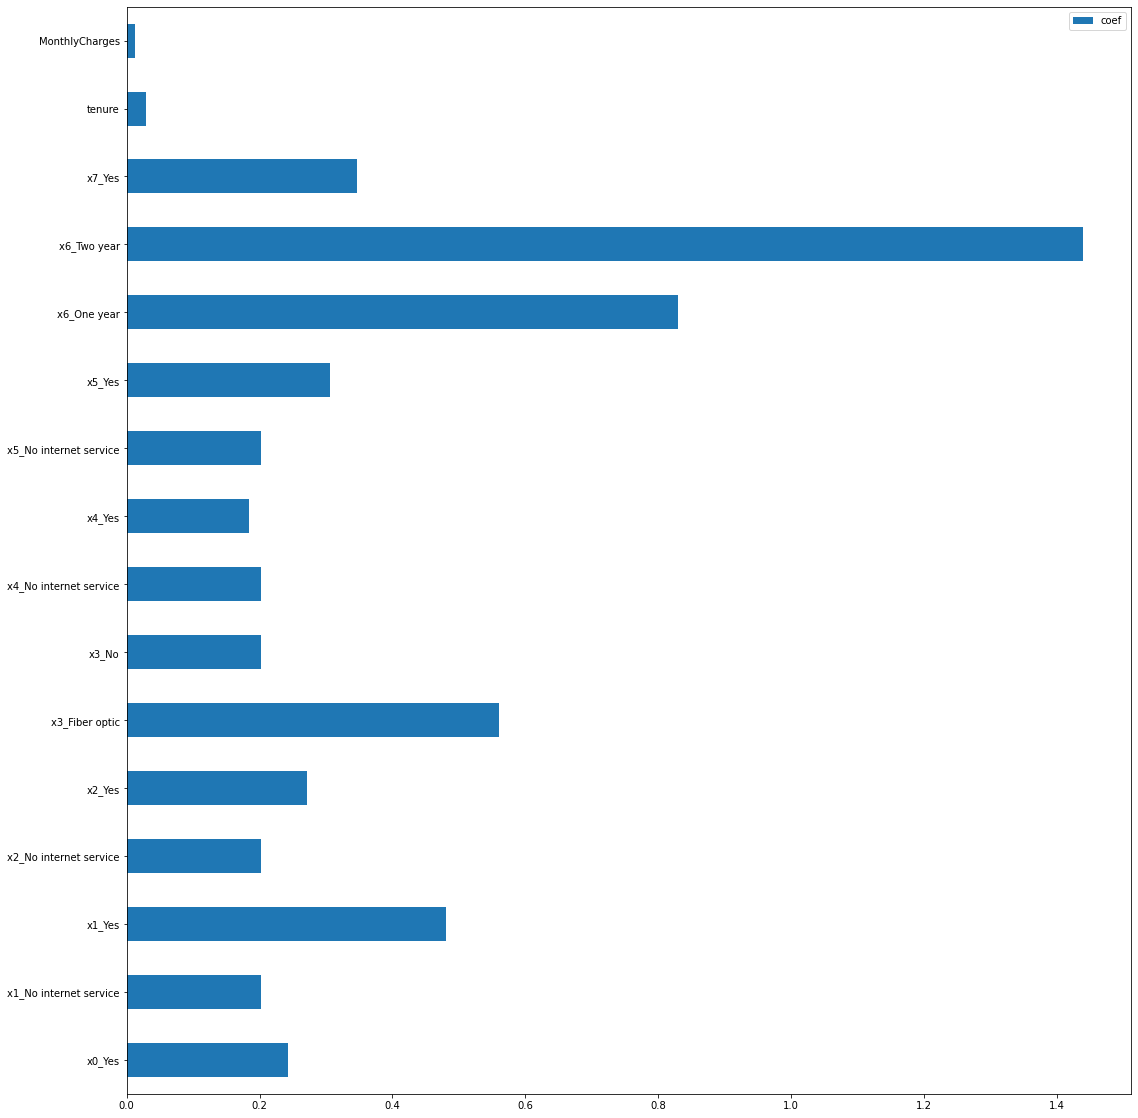

In [ ]:
abs(coef_table).plot(kind = 'barh', figsize = (18,20))

Dari koefisien score tersebut, saya akan menghapus 2 variabel dengan nilai score paling kecil yaitu tenure dan MonthlyCharges karena memiliki score dibawah 0.05.

### Re-run Using Feature Selection

- OneHotEncoding: Dependents, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract, PaperBilling
- Target: Churn

In [ ]:
df_tuning = df.copy()
df_tuning.drop(columns = ['tenure','MonthlyCharges'], inplace = True)
df_tuning.head()

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
0,Yes,No,No,DSL,Yes,Yes,Month-to-month,Yes,1
1,No,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,0
2,No,Yes,No,DSL,Yes,Yes,Two year,No,1
3,No,Yes,Yes,DSL,Yes,Yes,Two year,No,0
4,No,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,0


In [ ]:
# Processing Scheme
transformer_second = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 
                                                         'InternetService', 'DeviceProtection', 
                                                         'TechSupport', 'Contract', 'PaperlessBilling'])
], remainder='passthrough')

In [ ]:
X_select = df_tuning.drop('Churn', axis = 1)
y_select = df_tuning['Churn']

In [ ]:
X_select_train, X_select_test, y_select_train, y_select_test = train_test_split(X_select,y_select,
                                                   stratify = y_select,
                                                    test_size = 0.3,
                                                   random_state = 2022)

In [ ]:
logreg_second = LogisticRegression(C = 1, class_weight = 'balanced', max_iter = 100,
                                   multi_class = 'auto', random_state = 2022, solver = 'liblinear')
logreg_second_pipe = Pipeline([('transformer', transformer_second), ('model', logreg_second)])
logreg_second_pipe.fit(X_select_train, y_select_train)
print('After Feature Selection Process, the score is ', roc_auc_score(y_select_test, logreg_second_pipe.predict(X_select_test)))

After Feature Selection Process, the score is  0.7521521322808165


Logistic Regression After Tuning = 0.760819

Logistic Regression After Feature Selection = 0.752152

Hasilnya tidak lebih baik dibanding hasil setelah tuning, sehingga saya tetap melibatkan tenure dan MonthlyCharges

### Logistic Optimize Treshold

In [ ]:
df_th = df.copy()
X_th = df_th.drop('Churn', axis = 1)
y_th = df_th['Churn']
X_th_train, X_th_test, y_th_train, y_th_test = train_test_split(X_th, y_th,
                                                   stratify = y_th,
                                                    test_size = 0.3,
                                                   random_state = 2022)

In [ ]:
logreg_treshold = LogisticRegression(C = 1, class_weight = 'balanced', max_iter = 100,
                                   multi_class = 'auto', random_state = 2022, solver = 'liblinear')
logreg_pipe_treshold = Pipeline([('transformer', transformer), ('model', logreg)])
model = logreg_pipe_treshold.fit(X_th_train, y_th_train)


In [ ]:
th_value = [i/100 for i in range(20,61)]
score = 0
score_list = []

for i in th_value:
    # perhitungan score
    y_prob = model.predict_proba(X_th_test)[:,1]
    y_pred = np.where(y_prob>i, 1, 0)
    score_temp = roc_auc_score(y_th_test, y_pred)
    
    # penyimpanan hasil score
    score_list.append(score_temp)
    
    # comparasi: penentuan score terbaik
    if score_temp > score:
        score = score_temp
        best_th = i
    

In [ ]:
print('best score = ',score)
print('best treshold = ',best_th)

best score =  0.7718132561072447
best treshold =  0.33


Text(0.5, 1.0, 'Optimasi Treshold')

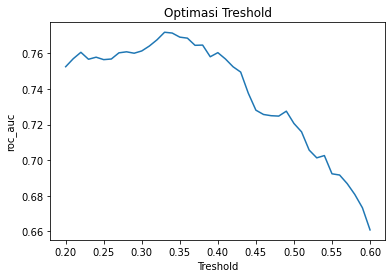

In [ ]:
sns.lineplot(th_value, score_list)
plt.xlabel('Treshold')
plt.ylabel('roc_auc')
plt.title('Optimasi Treshold')

Kenaikan nilai roc_auc setelah optimasi treshold hanya 1%, tidak sebanding dengan resiko tidak stabil nya pengubahan treshold menjadi 0.33 sehingga saya tetap menggunakan default treshold yaitu 0.5

## Conclusion and Recommendation

Hasil prediksi pada X_test memiliki score ROC_AUC adalah 0.760819.

Model yang digunakan adalah Logistic Regression.

Preprocessing Scheme:
- OneHotEncoding: Dependents, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract, PaperBilling
- MinMaxScaler: tenure, MonthlyCharges
- Target: Churn

Parameter terbaik
- C score: 1
- Solver: liblinear
- class_weight: balanced
- max_iter: 100
- multi_class: auto

pada random_state: 2022

## Model Deployment

In [ ]:
# Load Dataset
df_deploy = df.copy()
df_deploy.head()

X = df_deploy.drop('Churn', axis = 1)
y = df_deploy['Churn']

# Train Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                   test_size = 0.3,
                                                   random_state = 2022)

# Preprocessing Scheme
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 
                                                         'InternetService', 'DeviceProtection', 
                                                         'TechSupport', 'Contract', 'PaperlessBilling'])
], remainder='passthrough')

# Model
logreg = LogisticRegression(C = 1, class_weight = 'balanced', max_iter = 100, multi_class = 'auto', random_state = 2022, solver = 'liblinear')

# Pipeline
logreg_pipe = Pipeline([('transformer', transformer), ('logreg', logreg)])

# Train data




ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1138, in fit
    X, y = self._validate_data(
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py", line 2072, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'No'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1138, in fit
    X, y = self._validate_data(
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1074, in check_X_y
    X = check_array(
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py", line 2072, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Yes'


## Reference

https://www.analyticsvidhya.com/blog/2021/06/adaboost-a-brief-introduction-to-ensemble-learning/#:~:text=Advantages%20and%20disadvantages,-Coming%20to%20the&text=The%20accuracy%20of%20weak%20classifiers,it%20needs%20a%20quality%20dataset.

https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

https://towardsdatascience.com/machine-learning-case-study-telco-customer-churn-prediction-bc4be03c9e1d

https://towardsdatascience.com/end-to-end-machine-learning-project-telco-customer-churn-90744a8df97d

https://www.retentionscience.com/blog/evaluating-machine-learning-predictions-customer-churn-clv-rs-labs/

https://www.kaggle.com/code/juanmah/tactic-03-hyperparameter-optimization-adaboost#Introduction

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html